In [1]:
%matplotlib inline
from qiskit import *
from collections import namedtuple
from qutip import QubitCircuit, Measurement, Gate
from qutip import basis, tensor, identity
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import Qobj, Bloch, basis, ket, tensor
import warnings

warnings.filterwarnings('ignore')    #suppress warnings

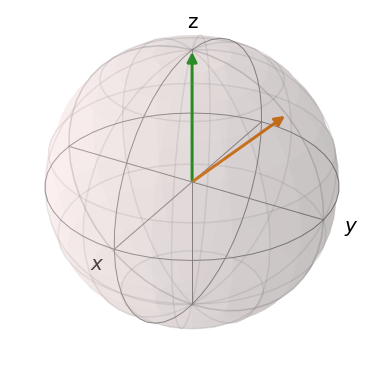

In [2]:
z = np.array([0, 0, 1])
mu = np.array([0, 1, 1]) / np.sqrt(2)

bloch = Bloch()
bloch.zlabel=("z", "")
bloch.add_vectors([z, mu])
bloch.show()

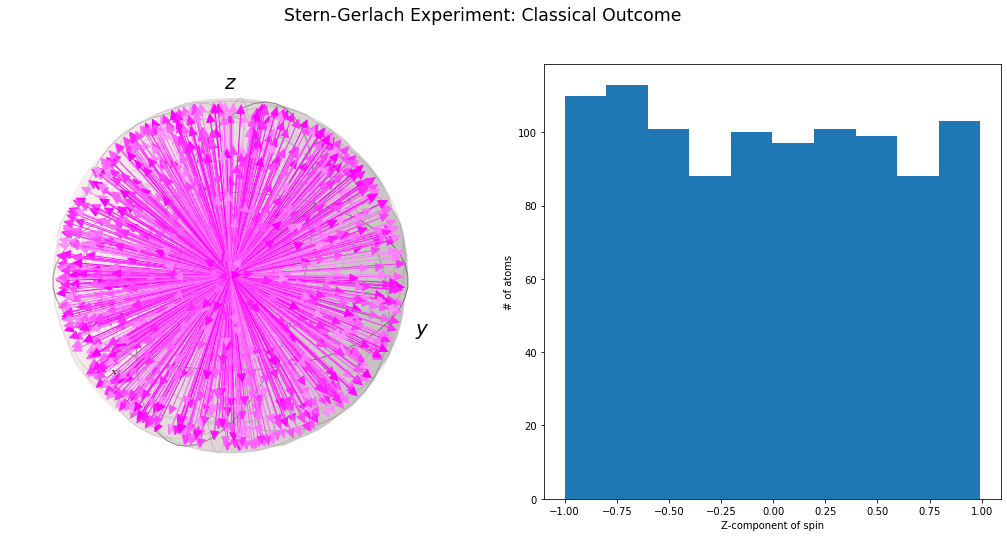

In [3]:
# Simulation of expected results in the classical case

Direction = namedtuple("Direction", ["theta", "phi"])


def random_direction():
    """ Generate a random direction. """
    # See http://mathworld.wolfram.com/SpherePointPicking.html
    r = 0
    while r == 0:
        x, y, z = np.random.normal(0, 1, 3)
        r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z / r)
    return Direction(theta=theta, phi=phi)

def classical_state(d):
    """ Prepare a spin state given a direction. """
    x = np.sin(d.theta) * np.cos(d.phi) 
    y = np.sin(d.theta) * np.sin(d.phi)
    z = np.cos(d.theta)
    return np.array([x, y, z])

classical_up = np.array([0, 0, 1])

def classical_spin(c):
    """ Measure the z-component of the spin. """
    return classical_up.dot(c)

def classical_stern_gerlach(n):
    """ Simulate the Stern-Gerlach experiment """
    directions = [random_direction() for _ in range(n)]
    atoms = [classical_state(d) for d in directions]
    spins = [classical_spin(c) for c in atoms]
    return atoms, spins

def plot_classical_results(atoms, spins):
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Stern-Gerlach Experiment: Classical Outcome", fontsize="xx-large")

    ax1 = plt.subplot(1, 2, 1, projection='3d')
    ax2 = plt.subplot(1, 2, 2)

    b = Bloch(fig=fig, axes=ax1)
    b.vector_width = 1
    b.vector_color = ["#ff{:x}0ff".format(i, i) for i in range(10)]
    b.zlabel = ["$z$", ""]
    b.add_vectors(atoms)
    b.render()

    ax2.hist(spins)
    ax2.set_xlabel("Z-component of spin")
    ax2.set_ylabel("# of atoms")
    
atoms, spins = classical_stern_gerlach(1000)
plot_classical_results(atoms, spins)    

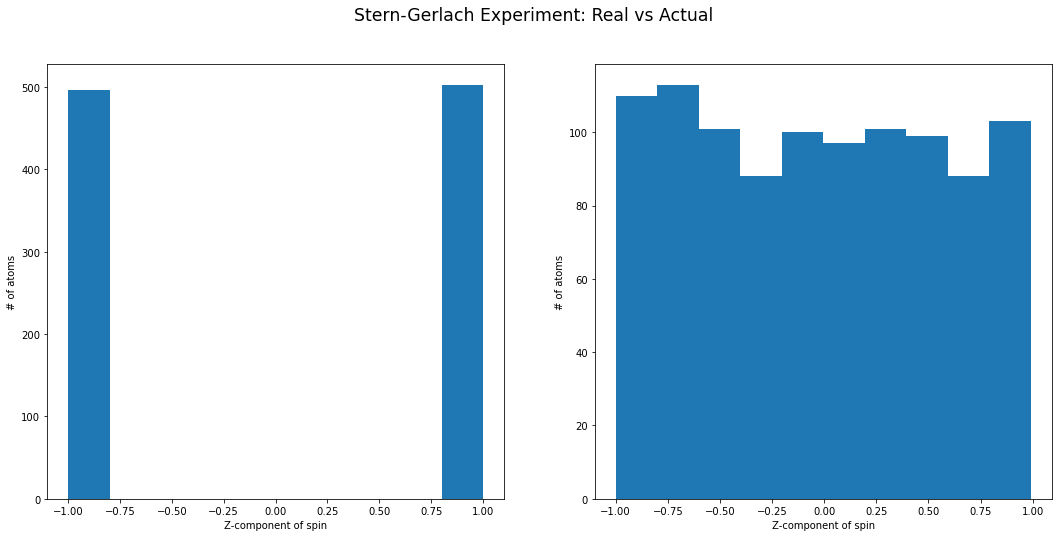

In [4]:
def plot_real_vs_actual(spins):
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Stern-Gerlach Experiment: Real vs Actual", fontsize="xx-large")

    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    ax1.hist([np.random.choice([1, -1]) for _ in spins])
    ax1.set_xlabel("Z-component of spin")
    ax1.set_ylabel("# of atoms")
    
    ax2.hist(spins)
    ax2.set_xlabel("Z-component of spin")
    ax2.set_ylabel("# of atoms")
plot_real_vs_actual(spins)    

In [5]:
class ClassicalBit:
    def __init__(self, outcome):
        self.outcome = outcome
            
b0 = heads = ClassicalBit(outcome=0)
b1 = tails = ClassicalBit(outcome=1)

def measure_cbit(cbit):
    return cbit.outcome

print("State:\n", b0)
print("Outcome:", measure_cbit(b0))


b0 = ket("0")  # |0>
b1 = ket("1")  # |1>

print("State:\n", b1)

State:
Outcome: 0
State:
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


In [6]:
def measure_qbit(qbit):
    if qbit == ket("0"):
        return 0
    if qbit == ket("1"):
        return 1
    raise NotImplementedError("No clue yet. :)")
    
print("Outcome:", measure_qbit(b1))

Outcome: 1


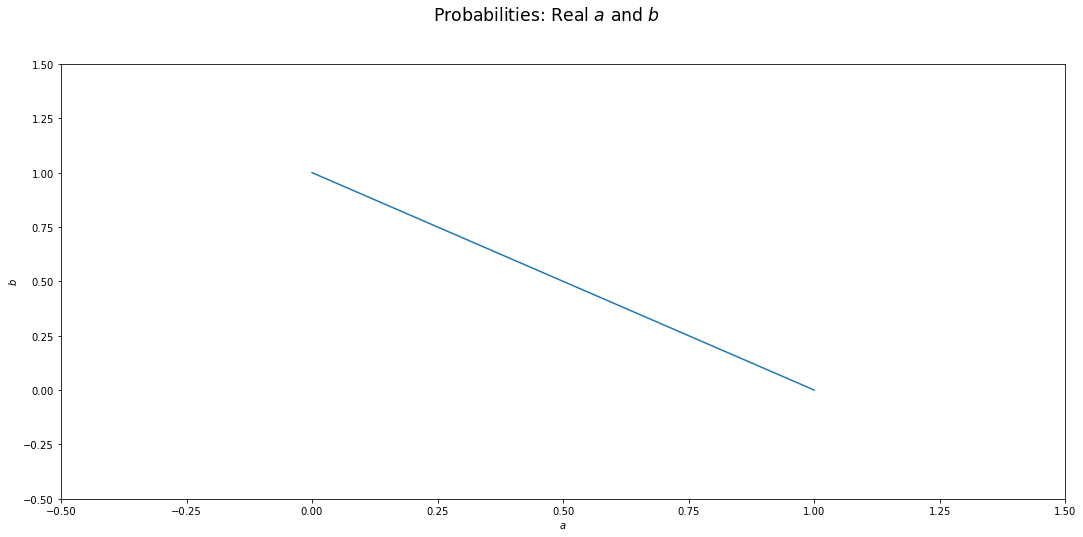

In [7]:
def plot_real_a_b():
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Probabilities: Real $a$ and $b$", fontsize="xx-large")

    ax = plt.subplot(1, 1, 1)

    ax.plot([0, 1], [1, 0])
    ax.set_xlabel("$a$")
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylabel("$b$")
    ax.set_ylim(-0.5, 1.5)
plot_real_a_b()    

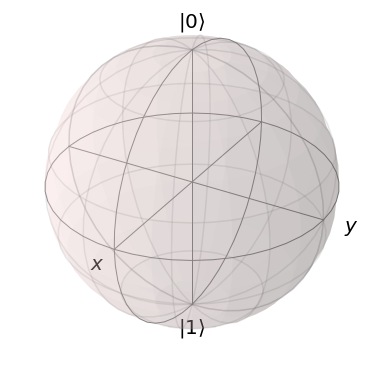

In [8]:
b = Bloch()
b.show()

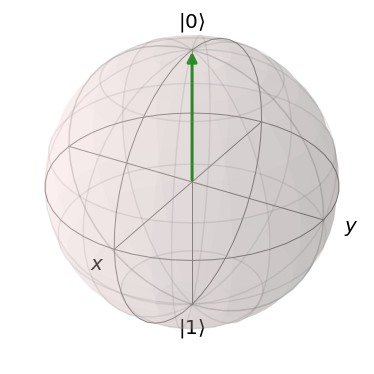

In [9]:
b = Bloch()
up = ket("0")

b.add_states([up])
b.show()

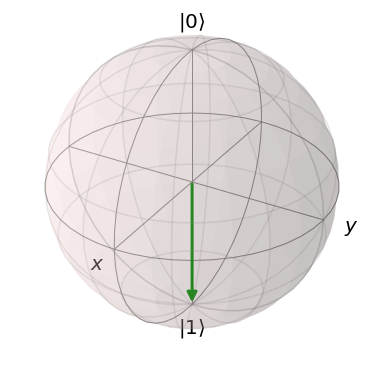

In [10]:
b = Bloch()
down = ket("1")
b.add_states([down])
b.show()

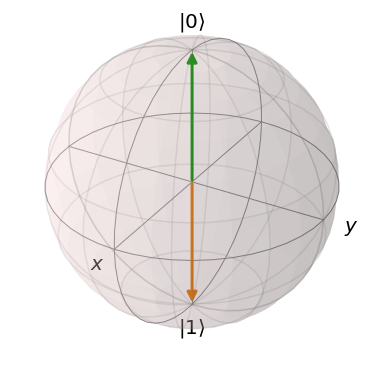

In [11]:
b = Bloch()
up = ket("0")
down = ket("1")
b.add_states([up, down])
b.show()

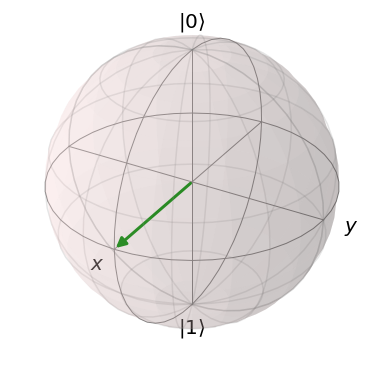

In [12]:
x = (up + down).unit()
b = Bloch()
b.add_states([x])
b.show()

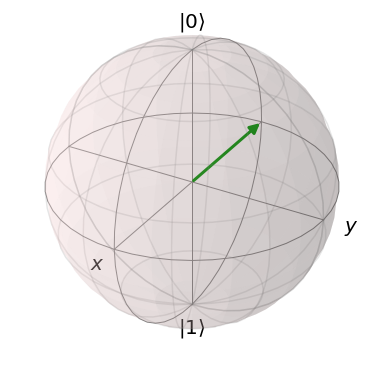

In [13]:
x = (up-down).unit()
b = Bloch()
b.add_states([x])
b.show()

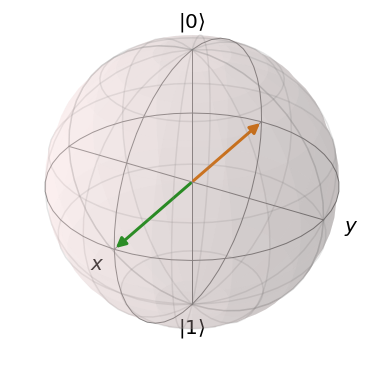

In [14]:
x1 = (up + down).unit()
x2 = (up-down).unit()
b = Bloch()
b.add_states([x1, x2])
b.show()

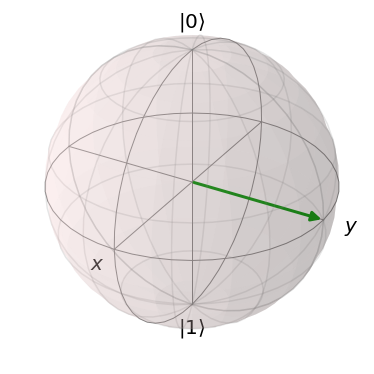

In [15]:
y = (up + (0 + 1j) * down).unit()
b = Bloch()
b.add_states([y])
b.show()

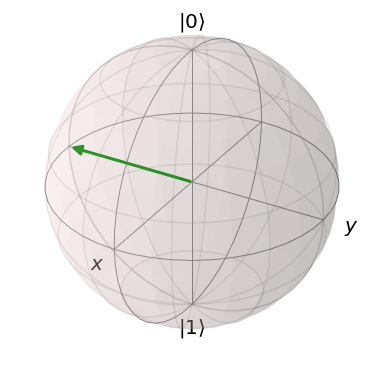

In [16]:
y = ((0 + 1j) *up +  down).unit()
b = Bloch()
b.add_states([y])
b.show()

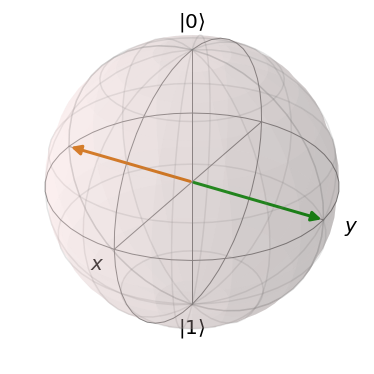

In [17]:
y1 = (up + (0 + 1j) * down).unit()
y2 = ((0 + 1j) *up +  down).unit()
b = Bloch()
b.add_states([y1, y2])
b.show()

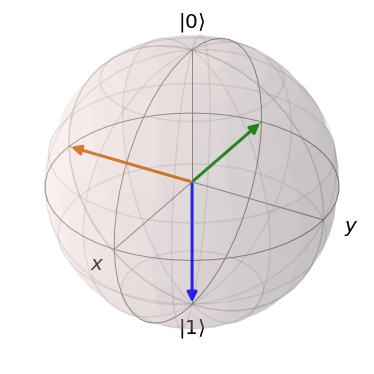

In [18]:
x = (up - down).unit()
y = ((0 + 1j) *up +  down).unit()
z = down
b = Bloch()
b.add_states([x, y, z])
b.show()

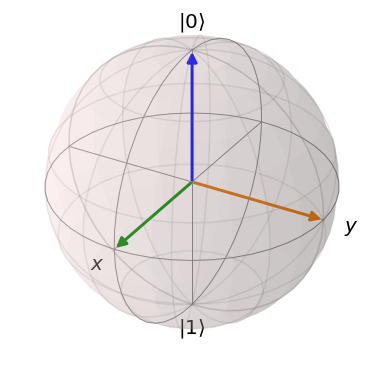

In [19]:
x = (up + down).unit()
y = (up + (0 + 1j) * down).unit()
z = up
b = Bloch()
b.add_states([x, y, z])
b.show()

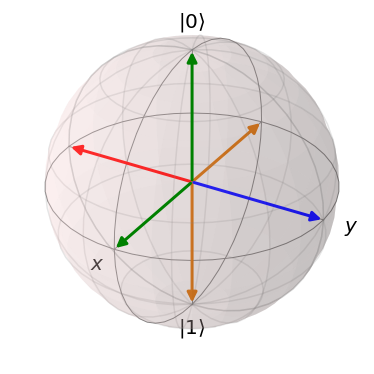

In [20]:
x1 = (up + down).unit()
x2 = (up - down).unit()
y1 = (up + (0 + 1j) * down).unit()
y2 = ((0 + 1j) *up +  down).unit()
z1 = up
z2 = down
b = Bloch()
b.add_states([x1, x2, y1, y2, z1, z2])
b.show()

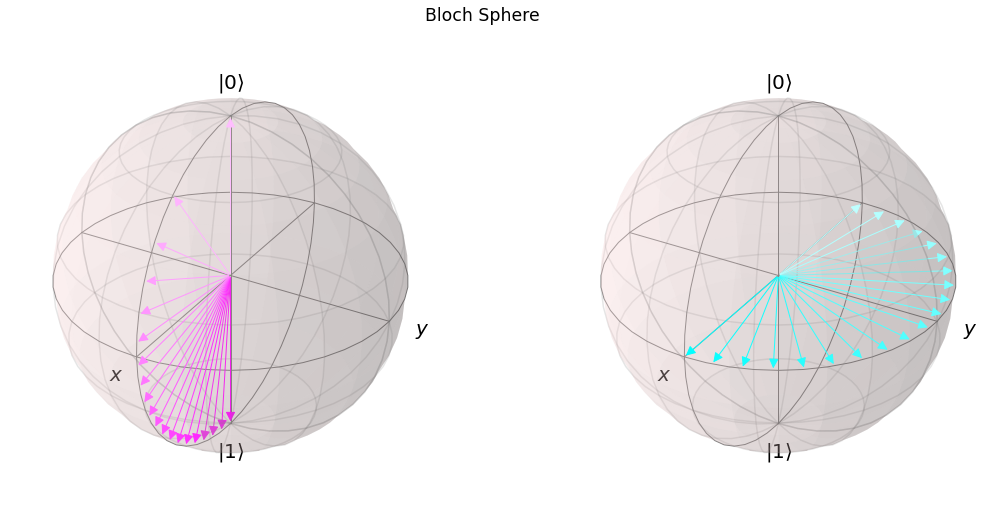

In [21]:
def plot_bloch(fig, ax, title, states, color_template):
    """ Plot some states on the bloch sphere. """
    b = Bloch(fig=fig, axes=ax)
    ax.set_title(title, y=-0.01)
    b.vector_width = 1
    b.vector_color = [color_template.format(i * 10) for i in range(len(states))]
    b.add_states(states)
    b.render()
    
def plot_multi_blochs(plots):
    """ Plot multiple sets of states on bloch spheres. """
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Bloch Sphere", fontsize="xx-large")
    n = len(plots)
    axes = [plt.subplot(1, n, i + 1, projection='3d') for i in range(n)]
    for i, (title, states, color_template) in enumerate(plots):
        plot_bloch(fig, axes[i], title, states, color_template)  
        
up = ket("0")
down = ket("1")

# magnitude_circle = [Qobj([[a], [np.sqrt(1 - a**2)]]) for a in np.linspace(0, 1, 20)]
magnitude_circle = [(a * up + np.sqrt(1 - a**2) * down) for a in np.linspace(0, 1, 20)]
# angular_circle = [Qobj([[np.sqrt(0.5)], [np.sqrt(0.5) * np.e ** (1j * theta)]]) for theta in np.linspace(0, np.pi, 20)]
angular_circle = [(np.sqrt(0.5) * up + np.sqrt(0.5) * down * np.e ** (1j * theta))for theta in np.linspace(0, np.pi, 20)]

plot_multi_blochs([["Changing relative magnitude", magnitude_circle, "#ff{:02x}ff"],
                   ["Changing relative angle", angular_circle, "#{:02x}ffff"],])

## Measuring a general state

In [22]:
def measure_qbit(qbit):
    a = qbit.full()[0][0]  # a
    b = qbit.full()[1][0]  # b
    if np.random.random() <= np.abs(a) ** 2:
        return 0
    else:
        return 1
    
  # |a|**2 + |b|**2 == 1

a = (1 + 0j) / np.sqrt(2)
b = (0 + 1j) / np.sqrt(2)
qbit = a * ket("0") + b * ket("1")
    
print("State:\n", qbit)
print("Outcome:", measure_qbit(qbit))  

State:
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
Outcome: 1


In [23]:
qbit = (1 * ket("0")) + (1j * ket("1"))
qbit = qbit.unit()

print("State:\n", qbit)
print("Outcome:", measure_qbit(qbit))

State:
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]
Outcome: 0


In [24]:
def component(qbit, direction):
    component_op = direction.dag()
    a = component_op * qbit
    return a[0][0]

def measure_qbit(qbit, direction):
    a = component(qbit, direction)
    if np.random.random() <= np.abs(a) ** 2:
        return 0
    else:
        return 1
    
    
up, down = ket("0"), ket("1")
x, y, z = (up + down).unit(), (up + (0 + 1j) * down).unit(), up

print("State:\n", x)
print("Outcomes:", [measure_qbit(x, direction=up) for _ in range(10)])    

State:
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]
Outcomes: [1, 0, 0, 1, 0, 1, 1, 1, 0, 0]


## simulate the Stern-Gerlach with QuTiP!

In [25]:
def quantum_state(d):
    """ Prepare a spin state given a direction. """
    return np.cos(d.theta / 2) * up + np.exp(1j * d.phi) * np.sin(d.theta / 2) * down

In [26]:
up = ket('0')

def quantum_spin(q):
    """ Measurement the z-component of the spin. """
    a_up = (up.dag() * q).tr()
    prob_up = np.abs(a_up) ** 2
    return 1 if np.random.uniform(0, 1) <= prob_up else -1

In [27]:
def quantum_stern_gerlach(n):
    """ Simulate the Stern-Gerlach experiment """
    directions = [random_direction() for _ in range(n)]
    atoms = [quantum_state(d) for d in directions]
    spins = [quantum_spin(q) for q in atoms]
    return atoms, spins

In [28]:
def plot_quantum_results(atoms, spins):
    fig = plt.figure(figsize=(18.0, 8.0))
    fig.suptitle("Stern-Gerlach Experiment: Quantum Outcome", fontsize="xx-large")

    ax1 = plt.subplot(1, 2, 1, projection='3d')
    ax2 = plt.subplot(1, 2, 2)

    b = Bloch(fig=fig, axes=ax1)
    b.vector_width = 1
    b.vector_color = ["#{:x}0{:x}0ff".format(i, i) for i in range(10)]
    b.add_states(atoms)
    b.render()

    ax2.hist(spins)
    ax2.set_xlabel("Z-component of spin")
    ax2.set_ylabel("# of atoms")

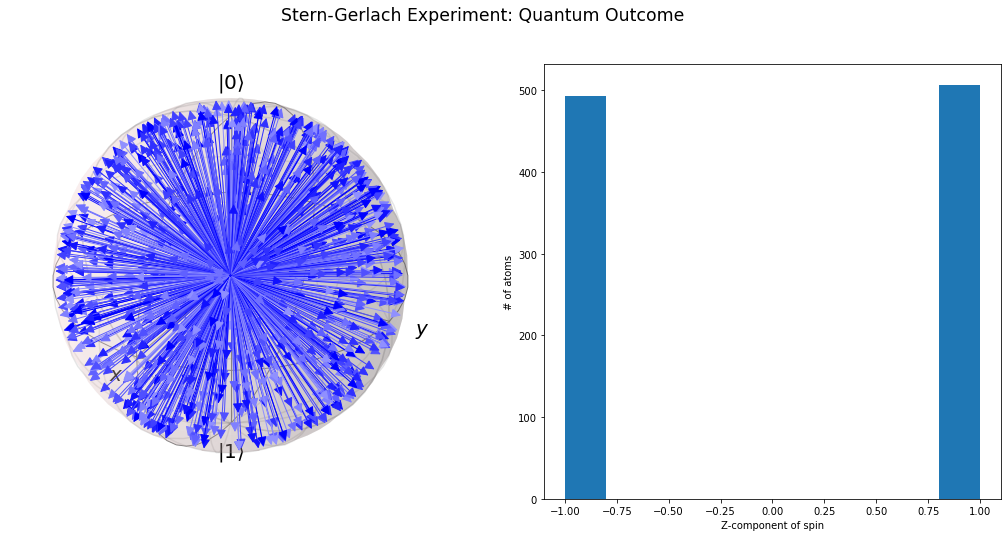

In [29]:
atoms, spins = quantum_stern_gerlach(1000)
plot_quantum_results(atoms, spins)

## Quantum Teleportation Circuit

In [30]:
from qutip import QubitCircuit, Measurement, Gate, basis, tensor, identity
from math import sqrt

teleportation = QubitCircuit(3, num_cbits = 2, input_states = ["\psi", "0", "0", "c0", "c1"])

# Example 1 : $|\Psi \rangle = | + \rangle$

In [31]:
a = 1/sqrt(2) * basis(2, 0) + 1/sqrt(2) * basis(2, 1)
state = tensor(a, basis(2,0), basis(2,0))
initial_measurement = Measurement("start", targets=[0])
initial_measurement.measurement_comp_basis(state)

([Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]],
  Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]],
 [0.4999999999999999, 0.4999999999999999])

In [32]:
state_final = teleportation.run(state)
print(state_final)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]]


In [33]:
final_measurement = Measurement("start", targets=[2])
final_measurement.measurement_comp_basis(state_final)

([Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.70710678]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.70710678]
   [0.        ]
   [0.        ]
   [0.        ]],
  None],
 [0.9999999999999998, 0.0])

# Example 2 : $|\Psi \rangle = | 1 \rangle$

In [34]:
%matplotlib inline

from collections import namedtuple
from qutip import Measurement, Gate
from qutip.qip.circuit import QubitCircuit
from qutip import basis, tensor, identity
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import Qobj, Bloch, basis, ket, tensor

state = tensor(basis(2,1), basis(2,0), basis(2,0))
initial_measurement = Measurement("start", targets=[0])
initial_measurement.measurement_comp_basis(state)

([None,
  Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]],
 [0.0, 1.0])

In [35]:
state_final = teleportation.run(state)
print(state_final)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]


In [36]:
final_measurement = Measurement("start", targets=[2])
final_measurement.measurement_comp_basis(state_final)

([Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]],
  None],
 [1.0, 0.0])

In [37]:
results = teleportation.run_statistics(state)
results.probabilities

[1]

In [38]:
results.final_states

[Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]]]

$Let,\displaystyle{ | \psi \rangle = \left( \begin{array}{c}\alpha \\ \beta \end{array} \right) , \text{ where }{\sqrt{\langle \psi | \psi \rangle}}=1 . }$

Think of Qubit as an Electron:$$\displaystyle{ \text{spin-up:}|0\rangle=\left( \begin{array}{c}1 \\ 0 \end{array} \right)  \\ {} \\\text{spin-down}:|1\rangle=\left( \begin{array}{c}0 \\ 1 \end{array} \right) }$$
    
Preapring other states from Basis States:
$$\displaystyle{ |00\rangle = |0\rangle \otimes |0\rangle = \left( \begin{array}{c}1 \\ 0 \end{array} \right) \otimes \left( \begin{array}{c}1 \\ 0 \end{array} \right) = \left( \begin{array}{c}1 \\ 0 \\ 0 \\ 0 \end{array} \right) \\
 |01\rangle = |0\rangle \otimes |1\rangle = \left( \begin{array}{c}1 \\ 0 \end{array} \right) \otimes \left( \begin{array}{c}0 \\ 1 \end{array} \right) = \left( \begin{array}{c}0 \\ 1 \\ 0 \\ 0 \end{array} \right) \\
 |10\rangle = |1\rangle \otimes |0\rangle = \left( \begin{array}{c}0 \\ 1 \end{array} \right) \otimes \left( \begin{array}{c}1 \\ 0 \end{array} \right) = \left( \begin{array}{c}0 \\ 0 \\ 1 \\ 0 \end{array} \right) \\
 |11\rangle = |1\rangle \otimes |1\rangle = \left( \begin{array}{c}0 \\ 1 \end{array} \right) \otimes \left( \begin{array}{c}0 \\ 1 \end{array} \right) = \left( \begin{array}{c}0 \\ 0 \\ 0 \\ 1 \end{array} \right) } $$

In [39]:
ket_zero = np.array([[1],[0]])
ket_one = np.array([[0],[1]])

In [40]:
np.kron(ket_one,ket_zero)

array([[0],
       [0],
       [1],
       [0]])